# Mohammad Amin Rami
# 98101588
# CHW 1 Question 2
# SVD And Image Processing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from math import log10, sqrt
from tqdm import tqdm

In [2]:
img = np.array(Image.open('q2_pic.jpg').convert('L'))

## Part 1

In [3]:
def low_rank_approx(A, r):
    U, S, VT = np.linalg.svd(A)
    r = min(S.shape[0], r)
    return U[:, :r], S[:r], VT[:r, :]

def reconstruct_approx(U, S, VT):
    return U * S @ VT

def PSNR(A, A_approx):
    mse = np.mean((A - A_approx) ** 2)
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr


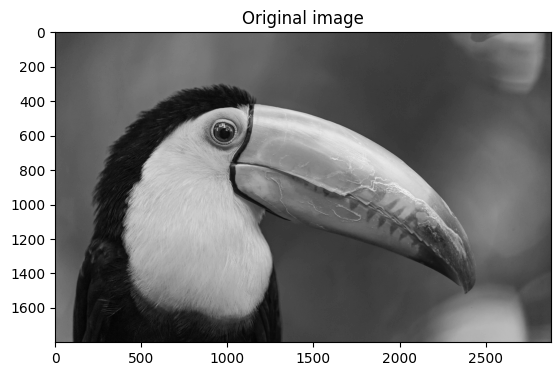

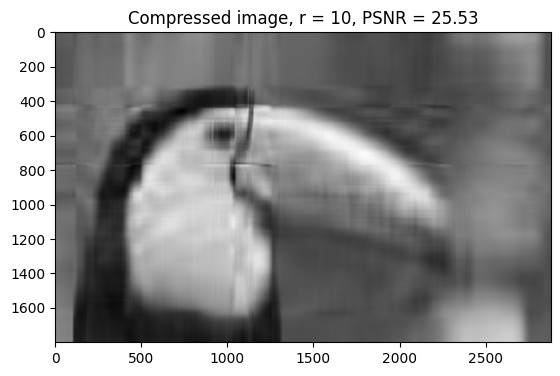

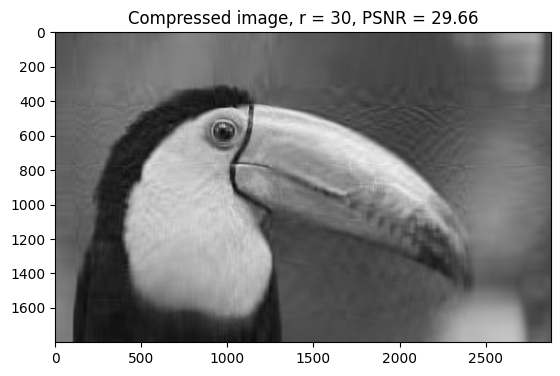

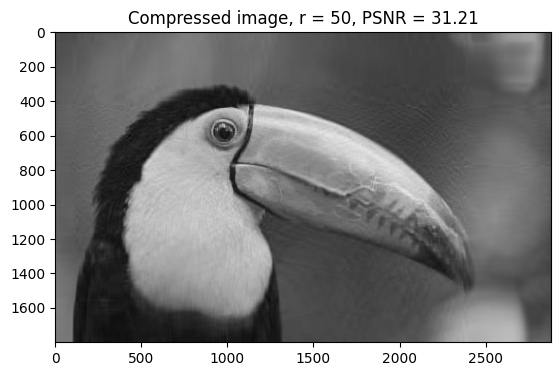

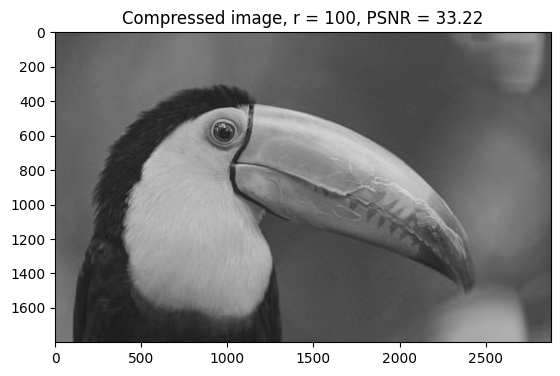

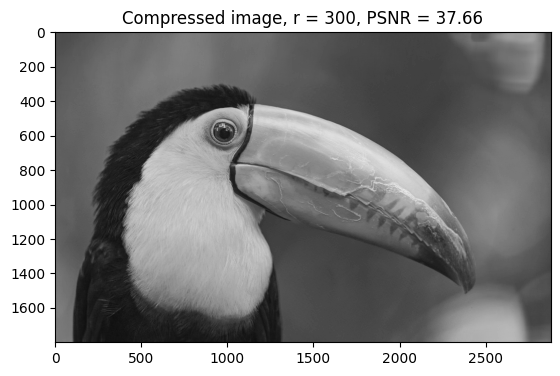

In [4]:
plt.imshow(img, cmap='gray')
plt.title('Original image')
plt.show()

for r in [10, 30, 50, 100, 300]:
    image_approx_data = low_rank_approx(img, r)
    image_approx = reconstruct_approx(*image_approx_data)
    psnr = PSNR(img, image_approx)
    plt.imshow(image_approx, cmap='gray')
    plt.title(f'Compressed image, r = {r}, PSNR = {round(psnr, 2)}')
    plt.show()

In [5]:
psnr_list = []
r_list = list(range(10,1000, 50))

for r in tqdm(r_list):
    image_approx_data = low_rank_approx(img, r)
    image_approx = reconstruct_approx(*image_approx_data)
    psnr = PSNR(img, image_approx)
    psnr_list.append(psnr)

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [02:20<00:00,  7.01s/it]


Text(0.5, 1.0, 'Plot of PSNR versus r')

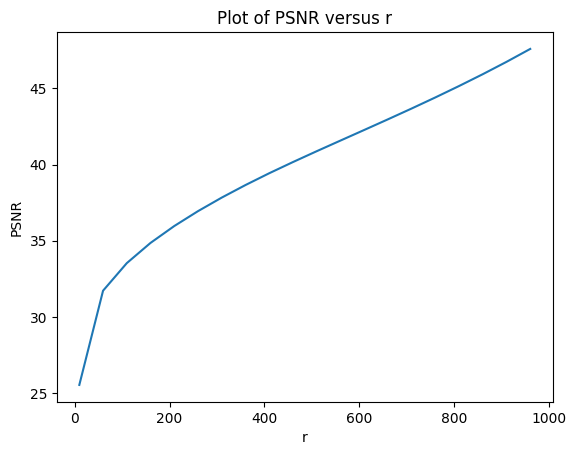

In [6]:
plt.plot(r_list, psnr_list, )
plt.xlabel('r')
plt.ylabel('PSNR')
plt.title('Plot of PSNR versus r')

# Part 2

In [7]:
def add_salt_noise(img, ratio):
    img_cpy = np.array(img)
    row , col = img_cpy.shape
    number_of_pixels = int(ratio * img_cpy.size / 2)
    for i in range(number_of_pixels):       
        y_coord = np.random.randint(0, row - 1)          
        x_coord = np.random.randint(0, col - 1)
        img_cpy[y_coord][x_coord] = 255
        
    for i in range(number_of_pixels):
        y_coord = np.random.randint(0, row - 1)
        x_coord = np.random.randint(0, col - 1)
        img_cpy[y_coord][x_coord] = 0
          
    return img_cpy

### Denoising Gaussian Noise

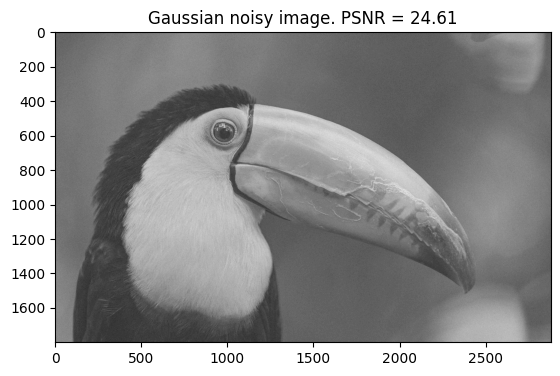

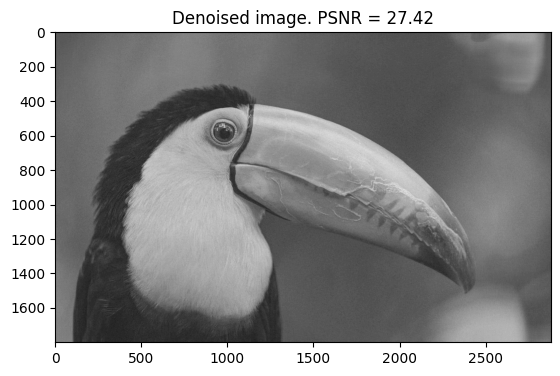

In [8]:
img_gaussian = img + np.random.normal(size=img.shape) * 15

plt.imshow(img_gaussian, cmap='gray')
psnr = round(PSNR(img, img_gaussian), 2)
plt.title(f'Gaussian noisy image. PSNR = {psnr}')
plt.show()

r = 400
denoised_img_data = low_rank_approx(img_gaussian, r)
denoised_img = reconstruct_approx(*denoised_img_data)
plt.imshow(denoised_img, cmap='gray')
psnr = round(PSNR(img, denoised_img), 2)
plt.title(f'Denoised image. PSNR = {psnr}')
plt.show()

### Denoising Salt And Pepper Noise

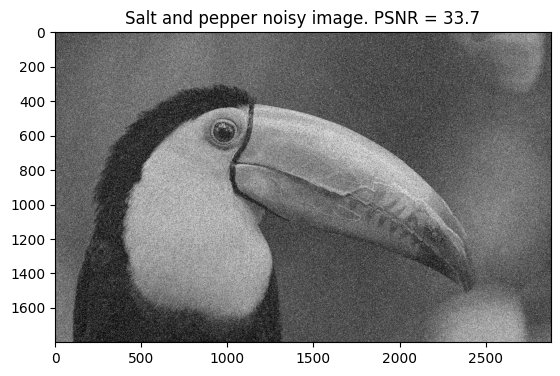

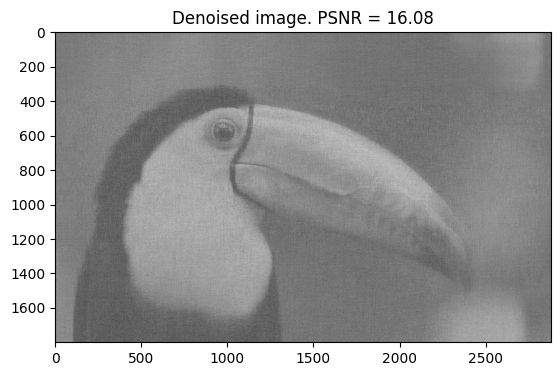

In [12]:
img_salt = add_salt_noise(img, 0.3)

plt.imshow(img_salt, cmap='gray')
psnr = round(PSNR(img, img_salt), 2)
plt.title(f'Salt and pepper noisy image. PSNR = {psnr}')
plt.show()

r = 200
denoised_img_data = low_rank_approx(img_salt, r)
denoised_img = reconstruct_approx(*denoised_img_data)
plt.imshow(denoised_img, cmap='gray')
psnr = round(PSNR(img, denoised_img), 2)
plt.title(f'Denoised image. PSNR = {psnr}')
plt.show()